### Package Imports

In [2]:
#Package imports
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import utils
sns.set_style('darkgrid')
from pandas_datareader import data #Package for pulling data from the web
from datetime import date
from fbprophet import Prophet 

### Pulling in Data

In [7]:
#Pulling in the tickers and economic predicators we're interested in
#ONLN = Online Retail ETF, FTXD = Nasdaq Retail ETF, XLY = S&P Consumer Discretionary ETF, 
#IYK iShares US Consumer Goods ETF, AMZN = Amazon, EBAY = Ebay, FB = Facebook
#JETS = Global Airline ETF (Recovery trade), XOP = S&P O&G Exploration and Production ETF (Recovery Trade)
#GOVT = US T-Bond ETF, CL=F = Crude, GC=F = Gold, SI=F = Silver, HG=F = Copper, ^VIX = CBOE Vix
tickers = ['NKE','SPY','ONLN','FTXD','XLY','IYK','AMZN','EBAY','FB','JETS','XOP','GOVT','CL=F','GC=F','SI=F','HG=F','^VIX']

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
etf_df= data.DataReader(tickers, 
                       start='2020-06-01', #start date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Dropping missing vals
etf_df = etf_df.dropna()

#Checking the 5 most recent values
etf_df.head(5)

Symbols,NKE,SPY,ONLN,FTXD,XLY,IYK,AMZN,EBAY,FB,JETS,XOP,GOVT,CL=F,GC=F,SI=F,HG=F,^VIX
Date,,,,,,,,,,,,,,,,,
2020-01-02,101.029839,317.873199,36.391594,24.345484,125.304070,130.009628,1898.010010,35.672466,209.779999,31.838161,91.429634,25.385975,61.180000,1524.500000,17.966000,2.8330,12.47
2020-01-03,100.753044,315.466217,36.154713,24.241549,124.237740,129.686676,1874.969971,35.338345,208.669998,31.157436,92.859421,25.512951,63.049999,1549.199951,18.068001,2.7985,14.02
2020-01-06,100.664078,316.669739,36.371853,24.266296,124.583305,129.970474,1902.880005,35.161457,212.600006,31.027491,93.477730,25.483650,63.270000,1566.199951,18.097000,2.8005,13.85
2020-01-07,100.614647,315.779327,36.510040,24.266296,124.385834,129.324585,1906.859985,35.004223,213.059998,30.930529,94.598358,25.434814,62.700001,1571.800049,18.316000,2.8040,13.79
2020-01-08,100.387283,317.462311,36.579132,24.300940,124.761024,130.029190,1891.969971,34.984566,215.220001,31.262394,91.004555,25.395744,59.610001,1557.400024,18.087999,2.8190,13.45


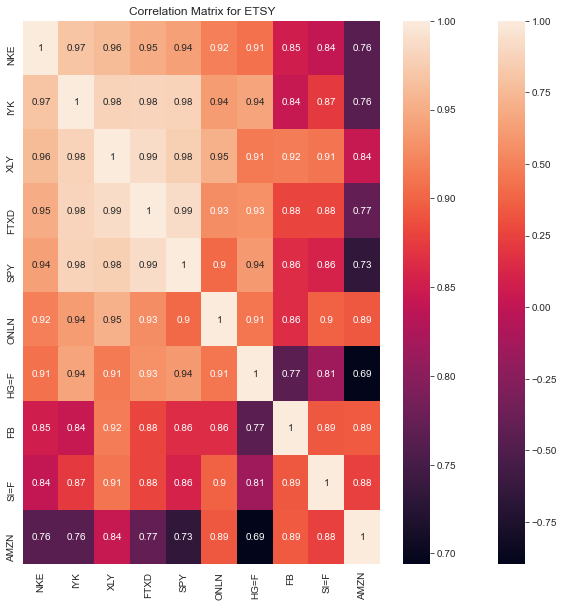

In [9]:
#Creating correlation matrix
corr_mat = etf_df.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr_mat)

#Quantifying the Correlation Matrix
i = 10
columns = corr_mat.nlargest(i,'NKE')['NKE'].index
corrmat = np.corrcoef(etf_df[columns].values.T)
heatmap = sns.heatmap(corrmat,
            cbar=True,
            annot=True, 
            xticklabels = columns.values,
            yticklabels = columns.values)
ax.set_title('Correlation Matrix for ETSY')
plt.show()

### Forecasting Predicator Variables Individually

In [50]:
#Creating dfs to model with

#IYK, JETS, AMZN

#Regressor 1 (IYK)
reg1_prophet = pd.DataFrame()
reg1_prophet['ds'] = etf_df.index
reg1_prophet['y'] = etf_df['IYK'].values

#Regressor 2 (JETS)
reg2_prophet = pd.DataFrame()
reg2_prophet['ds'] = etf_df.index
reg2_prophet['y'] = etf_df['JETS'].values

#Regressor 3 (AMZN)
reg3_prophet = pd.DataFrame()
reg3_prophet['ds'] = etf_df.index
reg3_prophet['y'] = etf_df['AMZN'].values

### Fitting Models

In [51]:
#Pred 1
reg1_m = Prophet()
reg1_m.fit(reg1_prophet)
reg1_future = reg1_m.make_future_dataframe(freq='m', periods=3);

#Pred 2
reg2_m = Prophet()
reg2_m.fit(reg2_prophet)
reg2_future = reg2_m.make_future_dataframe(freq='m', periods=3);

#Pred 3
reg3_m = Prophet()
reg3_m.fit(reg3_prophet)
reg3_future = reg3_m.make_future_dataframe(freq='m', periods=3);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Creating Forecast for Next 6 Months of Predicator Variables

In [52]:
#Defining length of forecast
future_pred_length = reg1_m.make_future_dataframe(freq='m',periods = 3)

#Pred 1
reg1_forecast = reg1_m.predict(future_pred_length)   
reg1_pred = pd.DataFrame(reg1_forecast['trend'].values)

#Pred 2
reg2_forecast = reg2_m.predict(future_pred_length)
reg2_pred = pd.DataFrame(reg2_forecast['trend'].values)

#Pred 3
reg3_forecast = reg3_m.predict(future_pred_length)
reg3_pred = pd.DataFrame(reg3_forecast['trend'].values)

In [53]:
#Combining predicators into one df
frames = [future_pred_length,reg1_pred,reg2_pred,reg3_pred]
predicator_forecast = pd.concat(frames,axis=1)
predicator_forecast.columns = ['ds','Reg_1','Reg_2','Reg_3']
predicator_forecast.head()

,ds,Reg_1,Reg_2,Reg_3
0,2020-01-02,133.188651,34.551026,1892.628728
1,2020-01-03,133.129818,34.341239,1893.752468
2,2020-01-06,132.953320,33.711878,1897.123688
3,2020-01-07,132.894487,33.502091,1898.247428
4,2020-01-08,132.835654,33.292304,1899.371168


### Forecasting ETF Performance with Predicator Variables

In [54]:
#Creating dfs to train model with (FB Prophet format)
etf_prophet = pd.DataFrame()
etf_prophet['ds'] = etf_df.index
etf_prophet['y'] = etf_df['NKE'].values
etf_prophet['Reg_1'] = etf_df['IYK'].values
etf_prophet['Reg_2'] = etf_df['JETS'].values
etf_prophet['Reg_3'] = etf_df['AMZN'].values

In [55]:
#Checking Prophet df
etf_prophet.head()

,ds,y,Reg_1,Reg_2,Reg_3
0,2020-01-02,101.029839,130.009628,31.838161,1898.010010
1,2020-01-03,100.753044,129.686676,31.157436,1874.969971
2,2020-01-06,100.664078,129.970474,31.027491,1902.880005
3,2020-01-07,100.614647,129.324585,30.930529,1906.859985
4,2020-01-08,100.387283,130.029190,31.262394,1891.969971


In [68]:
#Defining model, adding additional regressors and fitting model
m = Prophet()
m.add_regressor('Reg_1')
m.add_regressor('Reg_2')
m.add_regressor('Reg_3')
m.fit(etf_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
#Forecasting the next 90 days
etf_forecast = m.predict(predicator_forecast) 
etf_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Reg_1,Reg_1_lower,Reg_1_upper,Reg_2,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
310,2021-03-30,115.787138,132.673900,138.973123,115.787138,115.787138,17.435329,17.435329,17.435329,3.614111,...,20.343140,20.343140,20.343140,-0.311511,-0.311511,-0.311511,0.0,0.0,0.0,135.818767
311,2021-03-31,115.693874,133.010370,139.113971,115.693874,115.693874,17.448853,17.448853,17.448853,3.646070,...,20.389684,20.389684,20.389684,-0.024231,-0.024231,-0.024231,0.0,0.0,0.0,136.059327
312,2021-04-30,112.895938,130.627952,137.599575,111.324020,114.659423,17.854596,17.854596,17.854596,4.604853,...,21.786023,21.786023,21.786023,-0.519317,-0.519317,-0.519317,0.0,0.0,0.0,134.162645
313,2021-05-31,110.004739,126.992423,138.942593,104.879662,115.480522,18.273864,18.273864,18.273864,5.595596,...,23.228907,23.228907,23.228907,-0.452057,-0.452057,-0.452057,0.0,0.0,0.0,132.781589
314,2021-06-30,107.206804,121.616544,142.903391,97.699076,117.603892,18.679607,18.679607,18.679607,6.554380,...,24.625245,24.625245,24.625245,-0.024231,-0.024231,-0.024231,0.0,0.0,0.0,131.807818


Text(0.5, 1.0, '3 Month NKE Forecast [NKE]')

<Figure size 1440x720 with 0 Axes>

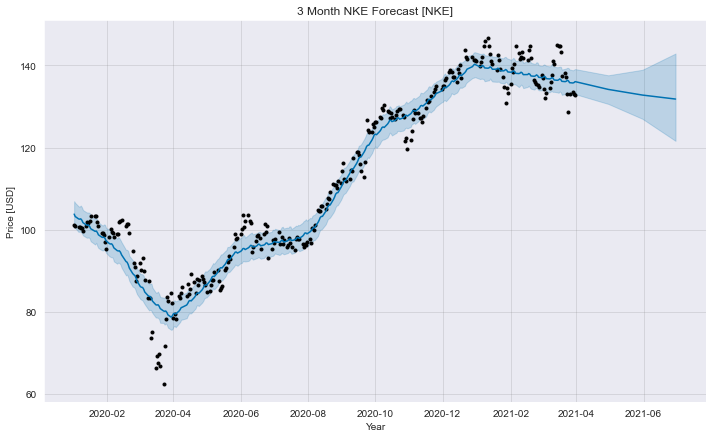

In [70]:
#Visualizing forecast
plt.figure(figsize = (20,10))
m.plot(etf_forecast, xlabel='Year',ylabel ='Price [USD]');
plt.title('3 Month NKE Forecast [NKE]')

<Figure size 1440x720 with 0 Axes>

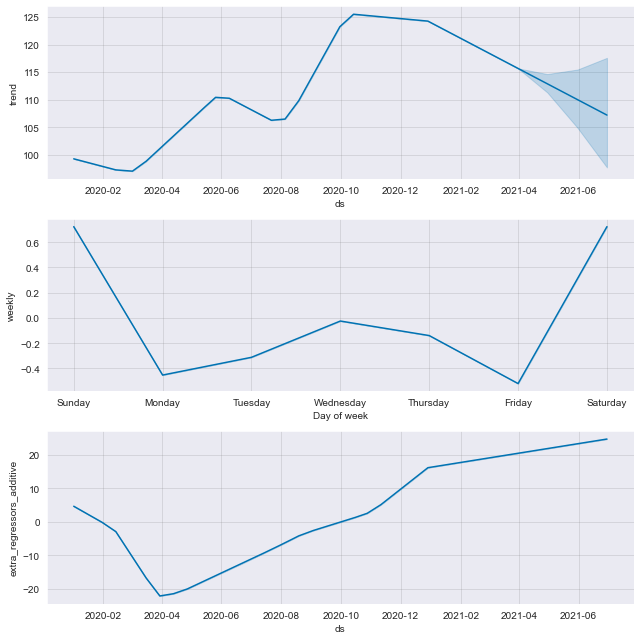

In [71]:
#Plotting forecast components
plt.figure(figsize = (20,10))
m.plot_components(etf_forecast);